# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [9]:
import numpy as np
import random

def int_montecarlo( a , b , N , funcion ):
    
    x=np.random.uniform(a,b,round(N))
    
    return np.mean(funcion(x))*(b-a)

def f(x):
    return np.exp(x)*np.log10(x)

def g(x):
    return np.sin(x)*np.log(x)

Tabla con las integrales

In [14]:
import pandas as pd

N=np.logspace(1,5,5)
df=pd.DataFrame(columns=['Aproximación 1','Error 1','Aproximación 2','Error 2'], index=N)
# El valor de la primera integral es de: 6.09207
# El valor de la segunda integral es de: 0.869844

for i in N:
    fx = int_montecarlo(1,3,i,f)
    df.loc[i,"Aproximación 1"] = fx
    df.loc[i,"Error 1"] = fx - 6.09207
    fx2 = int_montecarlo(1,3,i,g)
    df.loc[i,"Aproximación 2"] = fx2
    df.loc[i,"Error 2"] = fx2 - 0.869844
    
df

,Aproximación 1,Error 1,Aproximación 2,Error 2
10.0,4.251314,-1.840756,0.828014,-0.04183
100.0,6.034593,-0.057477,0.910143,0.040299
1000.0,5.973437,-0.118633,0.887763,0.017919
10000.0,6.129973,0.037903,0.863726,-0.006118
100000.0,6.089292,-0.002778,0.869354,-0.00049


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

Hacemos la desigualdad una igualdad para encontrar la forma de la que estaríamos calculando el área:
$$ x^2+2y^2=-2x+8y-7 $$

Ahora podemos agrupar las variables de un mismo lado de la ecuación para completar trinomios y formar binomios al cuadrado que nos ayuden a visualizar y resolver el problema:

> $$ x^2+2x+2y^2-8y=-7 $$
> $$ (x+1)^2+2(y-2)^2=-7+1+8$$
> $$ (x+1)^2+2(y-2)^2=2 $$
> $$ \frac{(x+1)^2}{2}+(y-2)^2=1 $$

Observando la forma de la ecuación, notamos que la elipse tiene centro en $(-1,2)$, también sabemos los valores de $a^2=2$ y $b^2=1$

Gráfica del área a calcular:
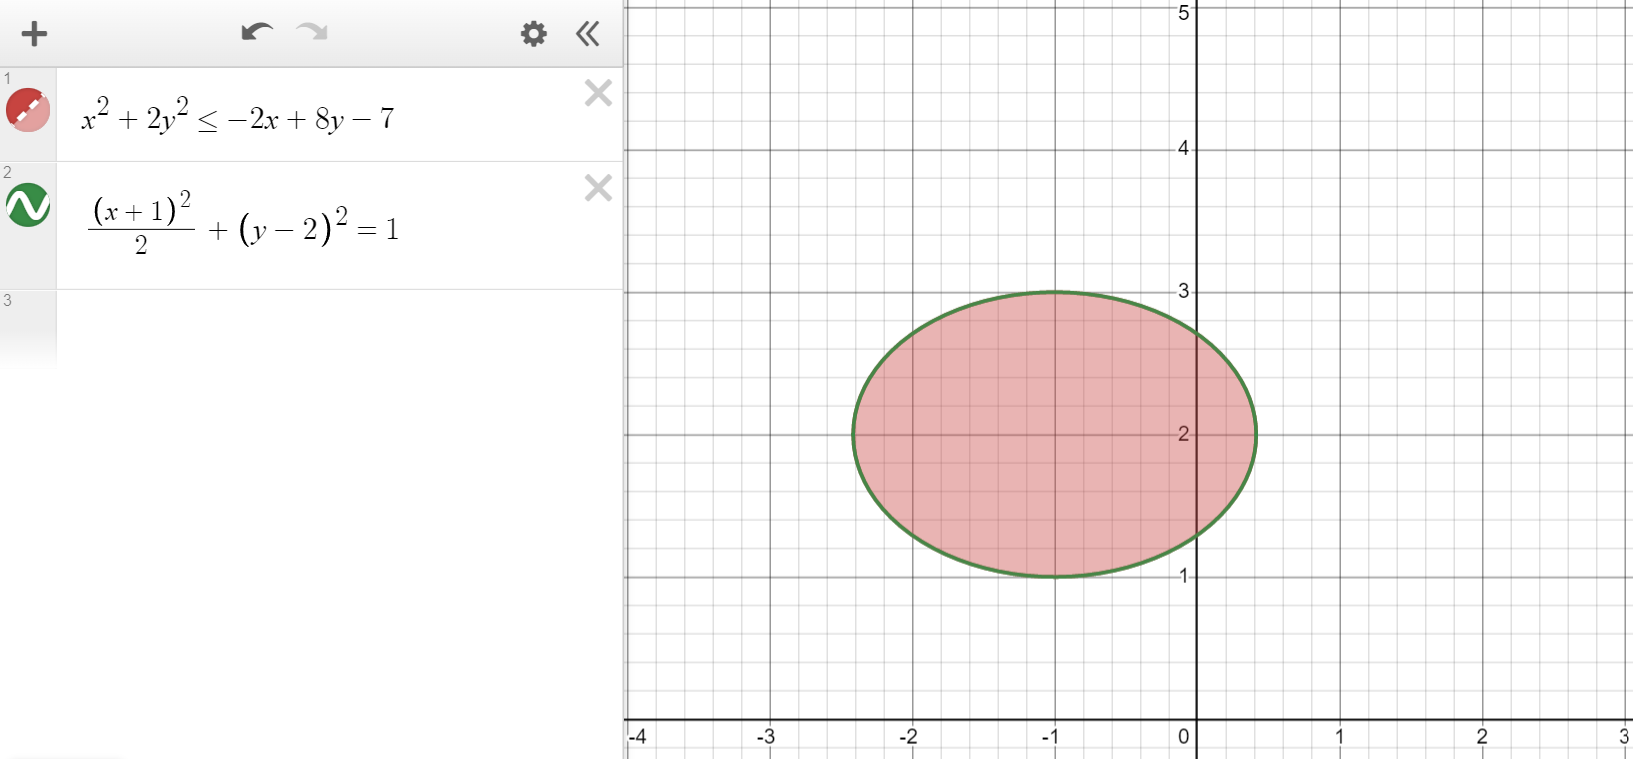

Usaremos la distancia focal para plantear el método que nos ayudará a aproximar el área, sabemos que:
> $$ c^2=a^2-b^2 $$
> Donde c es la distancia entre el centro de la elipse y sus focos, encontramos los focos:
> $$ c^2=2-1 $$
> $$ c=1 $$
> Entonces sus focos están en $(0,2)$ y $(-2,2)$
> También sabemos que la suma de las distancias entre un punto cualquiera sobre la curva de la elipse y sus dos focos es siempre constante. Encontramos esa distancia en un punto x=-1 :
> $$ \frac{0}{2}+(y-2)^2=1 $$
> $$ y-2=1 $$
> $$ y=3 $$
> Encontramos la constante  de distancia $K$ entre el punto $(-1,3)$ y los focos $(0,2)$,$(-2,2)$:
> $$ K=\sqrt{(0-1)^2+(2-3)^2}+\sqrt{(-2+1)^2+(2-3)^2} $$
> $$ K=2\sqrt{2} $$

Ahora podemos plantear que el área aproximada de esa figura será cualquier punto cuya suma de distancias entre los focos sea menor a $K$, porque buscamos los puntos dentro del elipse, la expresión matemática quedaría:

> $$\sqrt{(0-x)^2+(2-y)^2}+\sqrt{(-2-x)^2+(2-y)^2}\leq2\sqrt{2}$$

Sabemos que los puntos finales de la elipse están en $(-1+\sqrt{2},2)\approx(0.414,2)$,$(-1-\sqrt{2},2)\approx(-2.414,2)$,$(-1,3)$,$(-1,1)$. Entonces un buen valor de $R$ puede considerar estos extremos más 0.3, de esta forma $R$ quedaría conformada como:
> $$ R=[-1.3-\sqrt{2},0.7]\times[-0.7+\sqrt{2},3.3] $$


In [19]:
import numpy as np
import random

def int_montecarlo(a1,b1,a2,b2,f,N):
    x=np.random.uniform(a1,a2,round(N))
    y=np.random.uniform(b1,b2,round(N))
    B=f(x,y)
    Area=(a2-a1)*(b2-b1)
    return np.mean(B)*Area

def elipse(x,y):
    return (np.sqrt((0-x)**2 + (2-y)**2) + np.sqrt((-2-x)**2 + (2-y)**2))<=2*np.sqrt(2)

def desigualdad(x,y):
    return x**2 + (2*(y**2)) <= -2*x + 8*y - 7
def desigualdad2(x,y):
    return ((x+1)**2)/2 + (y-2)**2 <= 1

a1=-1.3-np.sqrt(2)
a2=-0.7+np.sqrt(2)

print(int_montecarlo( a1 , 0.7 , a2 , 3.3 , elipse , 1000000))
print(int_montecarlo(a1 , 0.7 , a2 , 3.3 , desigualdad , 1000000 ))
print(int_montecarlo(a1 , 0.7 , a2 , 3.3 , desigualdad2 , 1000000 ))


4.4412846074682575
4.443415032083575
4.443566568562488


In [21]:
# wolfram dice que la integral de eso es: sqrt(2)pi = 4.44288
# Formamos la tabla con los valores de la aproximación y error relativo

import pandas as pd
N=np.logspace(1,5,5)

Df=pd.DataFrame(columns=['Aproximación','Error','Error Relativo'], index=N)

for i in N:
    aprox=int_montecarlo(a1 , 0.7 , a2 , 3.3 , desigualdad , i )
    error=aprox-4.44288
    relativo=str(round(error/4.44288,2))+' %'
    Df.loc[i,'Aproximación'] = aprox
    Df.loc[i,'Error'] = error
    Df.loc[i,'Error Relativo'] = relativo

Df

,Aproximación,Error,Error Relativo
10.0,4.456955,0.014075,0.0 %
100.0,3.922121,-0.520759,-0.12 %
1000.0,4.679803,0.236923,0.05 %
10000.0,4.373165,-0.069715,-0.02 %
100000.0,4.444387,0.001507,0.0 %


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

1. Rentabilidad de proyectos: Calculamos la TIR y el VAN para poder determinar si es interesante hacer una inversión, o bien al contrario, qué inversión sería necesaria.

2. Riesgos: Hay dos elementos básicos en la estimación del riesgo, la probabilidad de que ocurra el evento y la gravedad. Es decir, para medir el riesgo de incendio, estimaríamos qué probabilidad hay de que se produzca un incendio y qué daños podría ocasionar.

Link: https://blog.selfbank.es/el-metodo-montecarlo-en-finanzas/

3. Calcular el precio de opciones: Parte del cálculo del precio justo de una opción consiste en encontrar la integral del precio de spot que el subyacente tomará (según las estimaciones) durante la vida de la opción. Aplica para opciones de tipo asiática, europea y americana. 

Fuente: http://mat.izt.uam.mx/mat/documentos/notas%20de%20clase/cfenaoe3.pdf